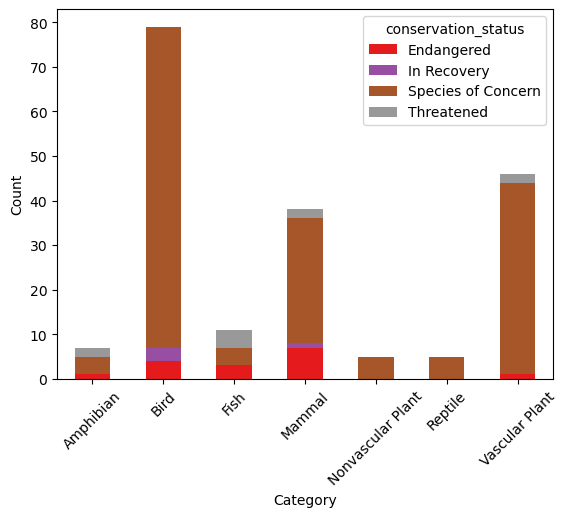

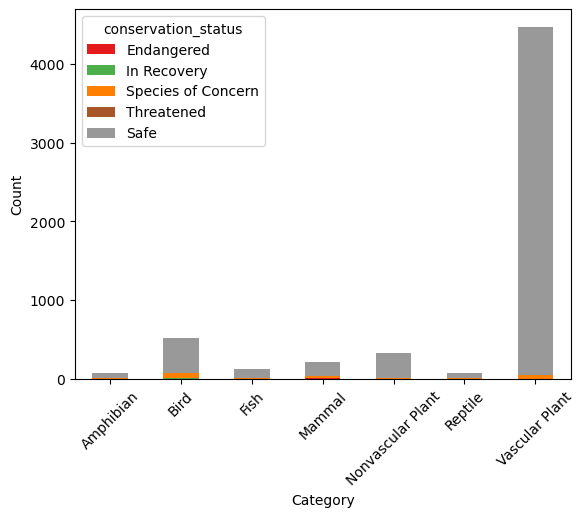

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Load data
species_info = pd.read_csv("species_info.csv")
observations = pd.read_csv("observations.csv")

# Extract categories from category column, and count instances of each category
categories = species_info.groupby('category').size().reset_index(name='category_count')
categories.columns = ['category', 'count']

# Generate a list of random colors, one color per category
colors_one = ['#%06x' % random.randint(0, 0xFFFFFF) for _ in range(len(categories['category']))]

# Add specific instance count of each category above the bar
bars = plt.bar(categories['category'], categories['count'], color=colors)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Plot the bar graph with appropriate title and labels
plt.title('Amount of Each Species Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Create dataframe containing the number of each conservation status instnace per category, omitting nan values
conservation_status = species_info.groupby(['category', 'conservation_status']).size().unstack(fill_value=0)

# Plot stacker bar graph with appropriate title and labels
conservation_status.plot(kind='bar', stacked=True, colormap='Set1')
plt.title('')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


counts = species_info.groupby('category').size()
conservation_status['Safe'] = counts - conservation_status.sum(axis=1)
conservation_status.plot(kind='bar', stacked=True, colormap='Set1')
plt.title('')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()